In [1]:
import pandas
import nltk
import string
import matplotlib.pyplot as plt 
import re
import string

table = str.maketrans('', '', string.punctuation)

def clean_token(token):
    return token.translate(table)

#read in our data
df = pandas.read_csv("../data/bbtop15-lyrics-master4.csv", index_col=0)
df

,track,artist,artist_gender,date,year,lyrics
track_id,,,,,,
0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\..."
1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...
2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu..."
3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...
4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...
5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor..."
6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...
7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...
8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...


In [2]:
df = df.dropna(subset=["lyrics"])
df

,track,artist,artist_gender,date,year,lyrics
track_id,,,,,,
0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\..."
1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...
2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu..."
3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...
4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...
5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor..."
6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...
7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...
8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...


## Descriptive Statistics and Visualization
The first thing we probably want to do is describe our data, to make sure everything is in order. We can use the describe function for the numerical data, and the value_counts function for categorical data.

In [4]:
print(df.describe()) #get descriptive statistics for all numerical columns
print()
print(df['artist_gender'].value_counts()) #frequency counts for categorical data
print()
print(df['year'].value_counts()) #treat year as a categorical variable
print()
print(df['year'].mode()) #find the year in which the most novels were published

              year
count  2317.000000
mean   2002.672421
std       8.257575
min    1989.000000
25%    1995.000000
50%    2002.000000
75%    2010.000000
max    2016.000000

Male      2092
Female     225
Name: artist_gender, dtype: int64

2016    123
1993    118
1992    108
2015     99
1994     97
1995     95
2013     91
2014     90
1991     89
2000     86
1999     83
1990     82
1998     80
2010     80
1996     79
2002     79
1997     78
2004     76
2007     76
2001     75
2008     73
2009     73
2003     73
2011     73
2006     71
2005     71
2012     71
1989     28
Name: year, dtype: int64

0    2016
dtype: int64


### Explore data grouped by year

In [5]:
#creat a pandas object that is a groupby dataframe, grouped year
grouped_year = df.groupby("year")
print(grouped_year.count())

      track  artist  artist_gender  date  lyrics
year                                            
1989     28      28             28    28      28
1990     82      82             82    82      82
1991     89      89             89    89      89
1992    108     108            108   108     108
1993    118     118            118   118     118
1994     97      97             97    97      97
1995     95      95             95    95      95
1996     79      79             79    79      79
1997     78      78             78    78      78
1998     80      80             80    80      80
1999     83      83             83    83      83
2000     86      86             86    86      86
2001     75      75             75    75      75
2002     79      79             79    79      79
2003     73      73             73    73      73
2004     76      76             76    76      76
2005     71      71             71    71      71
2006     71      71             71    71      71
2007     76      76 

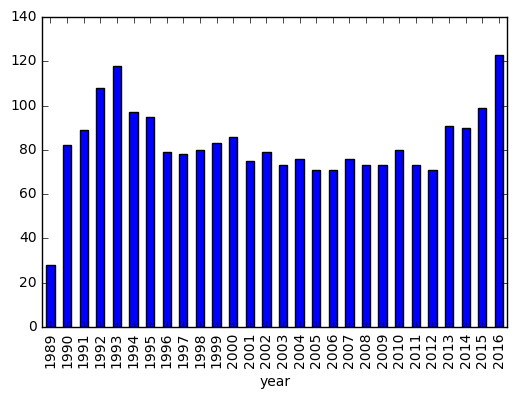

In [6]:
grouped_year['lyrics'].count().plot(kind = 'bar')
plt.show()

### Explore data grouped by gender

In [9]:
grouped_gender = df.groupby("artist_gender")
print(grouped_gender.count())

               track  artist  date  year  lyrics
artist_gender                                   
Female           225     225   225   225     225
Male            2092    2092  2092  2092    2092


### Exploring data grouped by artist

In [94]:
grouped_artist_name = df.groupby("artist")
print(grouped_artist_name.count().sort("track"))

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


                                                    track  artist_gender  \
artist                                                                     
Lil Jon Featuring Tyga                                  1              1   
Nelly Featuring Tim McGraw                              1              1   
Nelly Featuring Paul Wall, Ali & Gipp                   1              1   
Nelly Featuring Kyjuan, Ali & Murphy Lee                1              1   
Nelly Featuring Kelly Rowland                           1              1   
Nelly Featuring Jaheim                                  1              1   
Nelly Featuring Fergie                                  1              1   
Nelly Featuring Ashanti & Akon                          1              1   
Naughty By Nature Featuring Zhane                       1              1   
Naughty By Nature Featuring 3LW                         1              1   
Nature Featuring NAS                                    1              1   
Nastyboy Kli

In [90]:
grouped_artist_name['track'].count().plot(kind = 'bar')
plt.show()

ValueError: 
Pitbull Featuring Trina & Young Bo$$
                                  ^
Expected end of text (at char 34), (line:1, col:35)

## Tokenizing lyrics

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,track,artist,artist_gender,date,year,lyrics,tokens,tokens_clean,lyrics_clean
track_id,,,,,,,,,
0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","[[, Intro, ], '', What, 'll, we, get, for, 10,...",[],"\n\n\n""What'll we get for 10 dollars?""\n""Every..."
1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,"[[, Intro, ], Bust, it, [, Verse, 1, ], This, ...",[],\n\n\nBust it\n\n\nThis here's a jam for all t...
2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","[[, Verse, 1, ], Well, excuse, me, ,, take, a,...",[],"\n\n\nWell excuse me, take a few minutes, to m..."
3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,"[[, Kick, this, one, here, for, me, and, my, D...",[],\n\n\n\nYou can cha-cha-cha to this Mardis Gra...
4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,"[[, Verse, 1, ], I, go, to, work, like, a, doc...",[],\n\n\nI go to work like a doctor\nWhen I rock ...
5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","[Yo, Wreckx-N-Effect, In, full, effect, !, (, ...",[],"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor..."
6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,"[[, Hammer, ], Yo, !, My, Lone, Mixer, You, re...",[],\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...
7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,"[[, Intro, ], Have, you, ever, met, a, girl, t...",[],\n\n\nHave you ever met a girl that you tried ...
8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,"[[, Intro, ], Y'all, ready, for, this, Rastafa...",[],\n\n\nY'all ready for this\nRastafara Sonna Ma...


,track,artist,artist_gender,date,year,lyrics
track_id,,,,,,
0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\..."
1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...
2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu..."
3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...
4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...
5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor..."
6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...
7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...
8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...


In [3]:
# Remove all text that is in square brackets
df['lyrics_clean'] = df['lyrics'].apply(lambda x: re.sub(r'\[.*\]', '', x))
df['lyrics_clean'][0]

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


'\n\n\n"What\'ll we get for 10 dollars?"\n"Every \'ting you want"\n"Everything?"\n"Every \'ting.."\n\n\nAhh! Me so horny!\nMe love you long time!\n\n\nSitting at home with my dick on hard\nSo I got the black book for a freak to call\nPicked up the telephone, then dialed the 7 digits\nSaid, "Yo, this Marquis, baby! Are you down with it?"\nI arrived at her house, knocked on the door\nNot having no idea of what the night had in store\nI\'m like a dog in heat, a freak without warning\nI have an appetite for sex, cause me so horny\n\n\n\n\nGirls always ask me why I fuck so much\nI say "What\'s wrong, baby doll, with a quick nut?"\nCause you\'re the one, and you shouldn\'t be mad\nI won\'t tell your mama if you don\'t tell your dad\nI know he\'ll be disgusted when he sees your pussy busted\nWon\'t your mama be so mad if she knew I got that ass?\nI\'m a freak in heat, a dog without warning\nMy appetite is sex, cause me so horny\n\n\n\n\nYou can say I\'m desperate, even call me perverted\nBut 

In [7]:
#removing apostrophy
df['lyrics_clean'] = df['lyrics_clean'].apply(lambda x: x.replace("'", ''))
print(df['lyrics_clean'][0])
print(df['lyrics_clean'][1])




"Whatll we get for 10 dollars?"
"Every ting you want"
"Everything?"
"Every ting.."


Ahh! Me so horny!
Me love you long time!


Sitting at home with my dick on hard
So I got the black book for a freak to call
Picked up the telephone, then dialed the 7 digits
Said, "Yo, this Marquis, baby! Are you down with it?"
I arrived at her house, knocked on the door
Not having no idea of what the night had in store
Im like a dog in heat, a freak without warning
I have an appetite for sex, cause me so horny




Girls always ask me why I fuck so much
I say "Whats wrong, baby doll, with a quick nut?"
Cause youre the one, and you shouldnt be mad
I wont tell your mama if you dont tell your dad
I know hell be disgusted when he sees your pussy busted
Wont your mama be so mad if she knew I got that ass?
Im a freak in heat, a dog without warning
My appetite is sex, cause me so horny




You can say Im desperate, even call me perverted
But you say Im a dog when I leave you fucked and deserted
Ill play wi

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
##Tokenise 
df['tokens'] = df['lyrics_clean'].apply(lambda x: nltk.word_tokenize(x))

print(df['tokens'][0])
print(df['tokens'][1])

["''", 'Whatll', 'we', 'get', 'for', '10', 'dollars', '?', "''", '``', 'Every', 'ting', 'you', 'want', "''", "''", 'Everything', '?', "''", '``', 'Every', 'ting..', "''", 'Ahh', '!', 'Me', 'so', 'horny', '!', 'Me', 'love', 'you', 'long', 'time', '!', 'Sitting', 'at', 'home', 'with', 'my', 'dick', 'on', 'hard', 'So', 'I', 'got', 'the', 'black', 'book', 'for', 'a', 'freak', 'to', 'call', 'Picked', 'up', 'the', 'telephone', ',', 'then', 'dialed', 'the', '7', 'digits', 'Said', ',', '``', 'Yo', ',', 'this', 'Marquis', ',', 'baby', '!', 'Are', 'you', 'down', 'with', 'it', '?', "''", 'I', 'arrived', 'at', 'her', 'house', ',', 'knocked', 'on', 'the', 'door', 'Not', 'having', 'no', 'idea', 'of', 'what', 'the', 'night', 'had', 'in', 'store', 'Im', 'like', 'a', 'dog', 'in', 'heat', ',', 'a', 'freak', 'without', 'warning', 'I', 'have', 'an', 'appetite', 'for', 'sex', ',', 'cause', 'me', 'so', 'horny', 'Girls', 'always', 'ask', 'me', 'why', 'I', 'fuck', 'so', 'much', 'I', 'say', '``', 'Whats', 'wro

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
from functools import reduce
from nltk.corpus import stopwords
porter = nltk.PorterStemmer()

lyrics = [df['lyrics_clean'][0], df['lyrics_clean'][1], df['lyrics_clean'][2]]

##### TOKENIZING ####
#Split on white space, lower case
tokens_list = [song.split() for song in lyrics]
#print(reduce((lambda x, y: x + y), [len(tokens) for tokens in tokens_list]))

##### NORMALIZING ####

##Lowercase
token_list_lower = [[token.lower() for token in group] for group in tokens_list]

#Remove punctuation
token_list_lower = [[clean_token(token) for token in group] for group in token_list_lower]

#Drop empty strings
token_list_lower = [[token for token in group if token] for group in token_list_lower]

#print(reduce((lambda x, y: x + y), [len(tokens) for tokens in token_list_lower]))

##### Excluding classes of words ####
#Drop digits
token_list_lower = [[token for token in group if not token.isdigit()] for group in token_list_lower]


#Remove stop-words
token_list_lower_stopfree = [[token for token in group if token not in stopwords.words('english')] for group in token_list_lower]
print(token_list_lower_stopfree[0])
print(reduce((lambda x, y: x + y), [len(tokens) for tokens in token_list_lower_stopfree]))



##### Stemming ####

tokens_lower_stopfree_stemmed = [[porter.stem(t) for t in group] for group in token_list_lower_stopfree]
print(tokens_lower_stopfree_stemmed[0])

['whatll', 'get', 'dollars', 'every', 'ting', 'want', 'everything', 'every', 'ting', 'ahh', 'horny', 'love', 'long', 'time', 'sitting', 'home', 'dick', 'hard', 'got', 'black', 'book', 'freak', 'call', 'picked', 'telephone', 'dialed', 'digits', 'said', 'yo', 'marquis', 'baby', 'arrived', 'house', 'knocked', 'door', 'idea', 'night', 'store', 'im', 'like', 'dog', 'heat', 'freak', 'without', 'warning', 'appetite', 'sex', 'cause', 'horny', 'girls', 'always', 'ask', 'fuck', 'much', 'say', 'whats', 'wrong', 'baby', 'doll', 'quick', 'nut', 'cause', 'youre', 'one', 'shouldnt', 'mad', 'wont', 'tell', 'mama', 'dont', 'tell', 'dad', 'know', 'hell', 'disgusted', 'sees', 'pussy', 'busted', 'wont', 'mama', 'mad', 'knew', 'got', 'ass', 'im', 'freak', 'heat', 'dog', 'without', 'warning', 'appetite', 'sex', 'cause', 'horny', 'say', 'im', 'desperate', 'even', 'call', 'perverted', 'say', 'im', 'dog', 'leave', 'fucked', 'deserted', 'ill', 'play', 'heart', 'like', 'game', 'ill', 'blowing', 'mind', 'youre', 

In [39]:
###Testing text files concordance

texts = [nltk.Text(tokens) for tokens in tokens_lower_stopfree_stemmed]

[print(text.concordance('money')) for text in texts]

No matches
None
Displaying 2 of 2 matches:
 sakin want man bring home bacon got money got car got woman girl sadist materi
theyr lyin beach perpetr tan brother money man beach your strollin real high ro
None
No matches
None


[None, None, None]

In [36]:
##removeing punctuation 
df['tokens_clean'] = df['tokens'].apply(lambda x: [word for word in x if (word not in list(string.punctuation)) and (re.match(r"['`]['`]", word) == None)])

#Remove puntuation inside tokens
df['tokens_clean'] = df['tokens_clean'].apply(lambda x: [clean_token(word) for word in x])
 
#drop emtpy strings    

df['tokens_clean'] = df['tokens_clean'].apply(lambda x: [word for word in x if word])

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


track_id
0       ['', What, 'll, we, get, for, 10, dollars, ?, ...
1       [Bust, it, This, here, 's, a, jam, for, all, t...
2       [Well, excuse, me, ,, take, a, few, minutes, ,...
3       [You, can, cha-cha-cha, to, this, Mardis, Gras...
4       [I, go, to, work, like, a, doctor, When, I, ro...
5       [Yo, Wreckx-N-Effect, In, full, effect, !, (, ...
6       [Yo, !, My, Lone, Mixer, You, ready, ?, Bust, ...
7       [Have, you, ever, met, a, girl, that, you, tri...
8       [Y'all, ready, for, this, Rastafara, Sonna, Ma...
9       [Oh, yeah.., Love, somebo-dy, ..., (, Al, B, ....
10      [POS, :, Now, let, 's, get, right, on, down, t...
11      [E-V-I-L, E, and, Ice-T, are, on, a, jack, mov...
12      [(, Samples, ), Oh, Ohhhhhh, You, got, it, !, ...
13      [Ladies, and, gentlemen, The, Kit-Kat, Club, i...
14      [Just, like, I, told, you, ,, you, must, learn...
17      [*sound, of, clocks, ringing*, Ready, in, the,...
18      [Artist, :, Run-D.M.C, Album, :, Back, From, H...
19   

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


track_id
0       [What, 'll, we, get, for, 10, dollars, Every, ...
1       [Bust, it, This, here, 's, a, jam, for, all, t...
2       [Well, excuse, me, take, a, few, minutes, to, ...
3       [You, can, cha-cha-cha, to, this, Mardis, Gras...
4       [I, go, to, work, like, a, doctor, When, I, ro...
5       [Yo, Wreckx-N-Effect, In, full, effect, Word, ...
6       [Yo, My, Lone, Mixer, You, ready, Bust, it, *L...
7       [Have, you, ever, met, a, girl, that, you, tri...
8       [Y'all, ready, for, this, Rastafara, Sonna, Ma...
9       [Oh, yeah.., Love, somebo-dy, ..., Al, B, Sure...
10      [POS, Now, let, 's, get, right, on, down, to, ...
11      [E-V-I-L, E, and, Ice-T, are, on, a, jack, mov...
12      [Samples, Oh, Ohhhhhh, You, got, it, The, glam...
13      [Ladies, and, gentlemen, The, Kit-Kat, Club, i...
14      [Just, like, I, told, you, you, must, learn, I...
17      [*sound, of, clocks, ringing*, Ready, in, the,...
18      [Artist, Run-D.M.C, Album, Back, From, Hell, S...
19   

In [37]:
#Lower case
df['tokens_clean_lower'] = df['tokens_clean'].apply(lambda x: [word.lower() for word in x])

df['tokens_clean_lower']

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


track_id
0       [whatll, we, get, for, 10, dollars, every, tin...
1       [bust, it, this, heres, a, jam, for, all, the,...
2       [well, excuse, me, take, a, few, minutes, to, ...
3       [you, can, chachacha, to, this, mardis, gras, ...
4       [i, go, to, work, like, a, doctor, when, i, ro...
5       [yo, wreckxneffect, in, full, effect, word, up...
6       [yo, my, lone, mixer, you, ready, bust, it, lo...
7       [have, you, ever, met, a, girl, that, you, tri...
8       [yall, ready, for, this, rastafara, sonna, mad...
9       [oh, yeah, love, somebody, al, b, sure, harmon...
10      [pos, now, lets, get, right, on, down, to, the...
11      [evil, e, and, icet, are, on, a, jack, move, l...
12      [samples, oh, ohhhhhh, you, got, it, the, glam...
13      [ladies, and, gentlemen, the, kitkat, club, is...
14      [just, like, i, told, you, you, must, learn, i...
17      [sound, of, clocks, ringing, ready, in, the, i...
18      [artist, rundmc, album, back, from, hell, song...
19   

In [ ]:
#Remove stop words, Remove numbers, stem words, remove words that occur very infrequently

In [38]:
# Remove stop words

from nltk.corpus import stopwords
df['tokens_clean_lower_stopfree'] = df['tokens_clean_lower'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['tokens_clean_lower_stopfree']

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


track_id
0       [whatll, get, 10, dollars, every, ting, want, ...
1       [bust, heres, jam, fellas, tryin, ladies, tell...
2       [well, excuse, take, minutes, mellow, big, dad...
3       [chachacha, mardis, gras, im, dopest, female, ...
4       [go, work, like, doctor, rock, mic, got, like,...
5       [yo, wreckxneffect, full, effect, word, know, ...
6       [yo, lone, mixer, ready, bust, lone, mixer, sa...
7       [ever, met, girl, tried, date, year, make, lov...
8       [yall, ready, rastafara, sonna, madda, fa, dro...
9       [oh, yeah, love, somebody, al, b, sure, harmon...
10      [pos, lets, get, right, skit, baby, brought, w...
11      [evil, e, icet, jack, move, layin, dope, groov...
12      [samples, oh, ohhhhhh, got, glamorous, life, g...
13      [ladies, gentlemen, kitkat, club, proud, prese...
14      [like, told, must, learn, calm, yet, wild, sty...
17      [sound, clocks, ringing, ready, intro, cue, se...
18      [artist, rundmc, album, back, hell, song, paus...
19   

In [42]:
lyrics = df['tokens_clean_lower_stopfree'].tolist()

In [43]:
lyrics_cat = [' '.join(n for n in lyric) for lyric in lyrics]

In [44]:
cat_lyrics = ''.join(n for n in lyrics_cat)

In [45]:
print(lyrics[0:10])

[['whatll', 'get', '10', 'dollars', 'every', 'ting', 'want', 'everything', 'every', 'ting', 'ahh', 'horny', 'love', 'long', 'time', 'sitting', 'home', 'dick', 'hard', 'got', 'black', 'book', 'freak', 'call', 'picked', 'telephone', 'dialed', '7', 'digits', 'said', 'yo', 'marquis', 'baby', 'arrived', 'house', 'knocked', 'door', 'idea', 'night', 'store', 'im', 'like', 'dog', 'heat', 'freak', 'without', 'warning', 'appetite', 'sex', 'cause', 'horny', 'girls', 'always', 'ask', 'fuck', 'much', 'say', 'whats', 'wrong', 'baby', 'doll', 'quick', 'nut', 'cause', 'youre', 'one', 'shouldnt', 'mad', 'wont', 'tell', 'mama', 'dont', 'tell', 'dad', 'know', 'hell', 'disgusted', 'sees', 'pussy', 'busted', 'wont', 'mama', 'mad', 'knew', 'got', 'ass', 'im', 'freak', 'heat', 'dog', 'without', 'warning', 'appetite', 'sex', 'cause', 'horny', 'say', 'im', 'desperate', 'even', 'call', 'perverted', 'say', 'im', 'dog', 'leave', 'fucked', 'deserted', 'ill', 'play', 'heart', 'like', 'game', 'ill', 'blowing', 'mind

In [46]:
cat_lyrics2 = sum(lyrics, [])

In [47]:
word_frequency = nltk.FreqDist(cat_lyrics2)

In [51]:
print(word_frequency.most_common(150))

[('im', 14804), ('like', 12669), ('got', 11432), ('get', 9394), ('know', 7800), ('dont', 7217), ('aint', 5499), ('na', 4890), ('go', 4690), ('yeah', 4670), ('cause', 4643), ('nigga', 4555), ('back', 4067), ('see', 4031), ('niggas', 3864), ('make', 3832), ('shit', 3809), ('love', 3706), ('one', 3649), ('baby', 3627), ('man', 3585), ('ya', 3555), ('thats', 3372), ('wan', 3187), ('let', 3158), ('come', 3108), ('say', 3094), ('want', 2904), ('time', 2901), ('girl', 2878), ('yo', 2858), ('fuck', 2845), ('gon', 2843), ('right', 2827), ('bitch', 2827), ('em', 2777), ('never', 2729), ('cant', 2693), ('take', 2611), ('money', 2497), ('way', 2396), ('oh', 2373), ('ta', 2255), ('tell', 2253), ('keep', 2140), ('put', 2103), ('youre', 2048), ('need', 2039), ('ass', 1965), ('give', 1938), ('yall', 1923), ('ill', 1903), ('real', 1855), ('still', 1839), ('hit', 1784), ('good', 1732), ('look', 1721), ('said', 1682), ('life', 1666), ('think', 1598), ('feel', 1560), ('new', 1543), ('hey', 1517), ('big', 

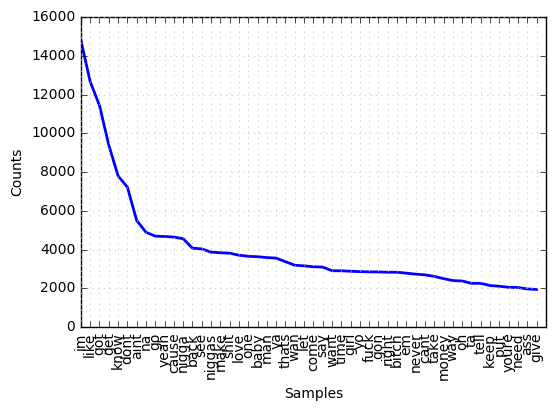

In [53]:
word_frequency.plot(50,cumulative=False)
plt.show()

In [54]:
df.to_csv(path_or_buf="../data/bbtop15-lyrics-exploring-tokenized.csv", index_label="track_id")